In [1]:
from keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras import backend as K
from keras import regularizers

import numpy as np
from keras.preprocessing import image
import tensorflow.keras.metrics


import matplotlib.pyplot as plt

import pandas as pd
import os
import shutil
import sys

Using TensorFlow backend.


In [2]:
# Variables to feed down into modeling
image_width,img_height = 150,150

train_data_dir = 'edible_classifier_images/train'
test_data_dir = 'edible_classifier_images/test'

nb_train_samples = 200
nb_test_samples = 20


epochs = 60
batch_size = 81 # Use powers of 2

In [3]:
# tell Keras to find the proper placement of the RBG data in each image
if K.image_data_format() =='channels_first':
    input_shape = (3,image_width,img_height)
else:
    input_shape = (image_width,img_height,3)

In [4]:
train_datagen = ImageDataGenerator(
                            rescale= (1.0 /255),
                            shear_range =0.2,
                            zoom_range =0.2,
                            horizontal_flip = True,
                            vertical_flip= True
                                    )

In [5]:
test_datagen = ImageDataGenerator( rescale= 1.0/255)

In [6]:
train_generator = train_datagen.flow_from_directory(
                                                    train_data_dir,
                                                    target_size=(image_width,img_height),
                                                    batch_size=batch_size,
                                                    class_mode = 'binary'
                                                    )

Found 483 images belonging to 2 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
                                                test_data_dir,
                                                target_size=(image_width,img_height),
                                                batch_size=batch_size,
                                                class_mode='binary'
                                                    )

Found 135 images belonging to 2 classes.


In [8]:
model = Sequential()

In [9]:
# First layer - input image
model.add(Conv2D(256,
                 kernel_size= (2,2), 
                 input_shape=input_shape, 
                 activation='relu',
                ))
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
# 2nd layer
model.add(Conv2D(81,
                 kernel_size=(2,2),
                 activation='relu',
                ))

model.add(MaxPooling2D(pool_size=(2,2)))


In [11]:
#3rd Layer
model.add(Conv2D(36,
                 kernel_size=(2,2),
                 activation='relu',
                ))

model.add(MaxPooling2D(pool_size=(2,2)))


In [12]:
# flatten
model.add(Flatten(input_shape=input_shape))

In [13]:
# 1st Dense
model.add(Dense(155, 
                activation='relu',
               ))


In [14]:
# 2nd Dense
model.add(Dense(32, 
                activation='relu',
               ))


In [15]:
# final output layer
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
model.compile( 
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
                )

In [17]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch= nb_train_samples // batch_size,
            epochs=epochs,
            validation_data=test_generator,
            validation_steps=nb_test_samples // batch_size,

)

model.save('history/edible_try.h5')

Epoch 1/60
2/2 [==============================] - 53s 26s/step - loss: 0.6910 - acc: 0.5370 - val_loss: 0.7680 - val_acc: 0.5852
Epoch 2/60
2/2 [==============================] - 40s 20s/step - loss: 0.6713 - acc: 0.5912 - val_loss: 0.7069 - val_acc: 0.4148
Epoch 3/60
2/2 [==============================] - 41s 21s/step - loss: 0.7025 - acc: 0.4630 - val_loss: 0.6729 - val_acc: 0.5852
Epoch 4/60
2/2 [==============================] - 43s 21s/step - loss: 0.6918 - acc: 0.5247 - val_loss: 0.6636 - val_acc: 0.5852
Epoch 5/60
2/2 [==============================] - 38s 19s/step - loss: 0.6830 - acc: 0.5849 - val_loss: 0.7147 - val_acc: 0.5852
Epoch 6/60
2/2 [==============================] - 42s 21s/step - loss: 0.6908 - acc: 0.5494 - val_loss: 0.6864 - val_acc: 0.5852
Epoch 7/60
2/2 [==============================] - 38s 19s/step - loss: 0.6863 - acc: 0.5494 - val_loss: 0.6789 - val_acc: 0.5852
Epoch 8/60
2/2 [==============================] - 31s 16s/step - loss: 0.6931 - acc: 0.5185 - val

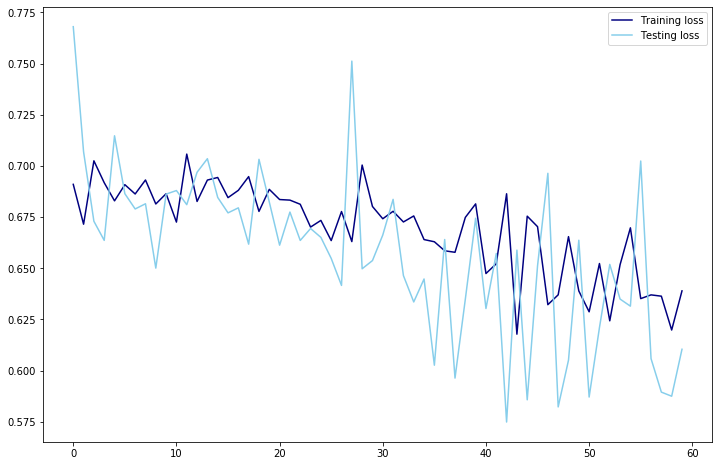

In [18]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend()
plt.savefig('figures/edibile_loss.png');

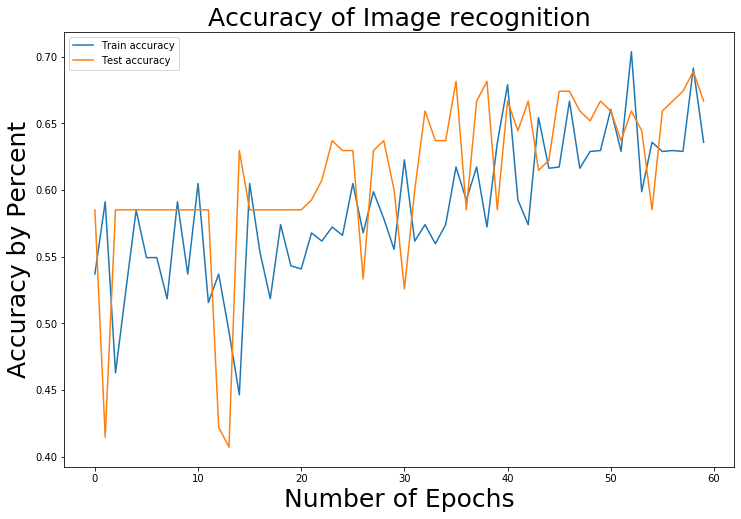

In [20]:
plt.figure(figsize=(12,8))
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend()

plt.title("Accuracy of Image recognition", fontsize=25)
plt.xlabel("Number of Epochs", fontsize=25)
plt.ylabel("Accuracy by Percent", fontsize=25)
plt.savefig('figures/edibile_acc.png');

# Test single image

In [21]:
# img_pred = image.load_img('edible_classifier_images/test/inedible/albatrellusconfluens2.jpg',target_size=(img_height,image_width))
# img_pred = image.img_to_array(img_pred)
# img_pred = np.expand_dims(img_pred, axis = 0)

In [22]:
# result = model.predict_classes(img_pred)

In [23]:
# print(result)

In [24]:
# if result[0][0] == 1:
#     prediction = 'inedible'
# else:
#     prediction = 'edible'
    
# print(prediction)

In [25]:
# model.predict(img_pred)

In [26]:
# float(model.predict(img_pred))

# Predict classes on testing - Inedible -data

In [27]:
#Create list for each image to be predicted on
ined_folder_list = sorted(os.listdir('edible_classifier_images/test/inedible'))
ined_folder_list[:5]

['albatrellusconfluens2.jpg',
 'amanitafulva2.jpg',
 'amanitamuscaria2.jpg',
 'amanitapantherina2.jpg',
 'amanitaphalloides2.jpg']

In [28]:
# Remove system/hidden files from the list so predictions aren't made on them
try:
    folder_list.remove('.DS_Store')
    folder_list.remove('.ipynb_checkpoints')
except:
    print('item not removed from folder list')

item not removed from folder list


In [29]:
ined_folder_list[:5]

['albatrellusconfluens2.jpg',
 'amanitafulva2.jpg',
 'amanitamuscaria2.jpg',
 'amanitapantherina2.jpg',
 'amanitaphalloides2.jpg']

In [30]:
# Generate Predictions on each test image in the inedible folder
ined_preds = []
ined_proba =[]
counter=0
for i in ined_folder_list[:]:
     # Read each image from the testing - bad morels folder and generate/save predictions   
    try:
        img_path =(f'edible_classifier_images/test/inedible/{i}')

        img_pred = image.load_img(img_path,target_size=(img_height,image_width))
        img_pred = image.img_to_array(img_pred)
        img_pred = np.expand_dims(img_pred, axis = 0)
        
        ined_preds.append(int(model.predict_classes(img_pred)))
        ined_proba.append(float(model.predict(img_pred)))
        
        counter += 1
    # if there is an error assign a 3 to the error in the list so we can find it in EDA steps    
    except:
        print(f'error on {counter}')
        ined_preds.append(3)
        ined_proba.append(3)

In [31]:
ined_preds[:10]

[0, 0, 1, 1, 1, 0, 0, 1, 1, 1]

In [32]:
ined_proba[:10]

[4.3736417482467815e-14,
 3.1145145588927866e-24,
 1.0,
 1.0,
 1.0,
 0.06332806497812271,
 7.684425213274546e-31,
 1.0,
 1.0,
 1.0]

    Convert predictions into a dataframe

In [33]:
ined_predictions_df = pd.DataFrame(ined_preds, columns =["predictions"])
ined_predictions_df.head()

,predictions
0,0
1,0
2,1
3,1
4,1


In [34]:
ined_predprobas_df = pd.DataFrame(ined_proba, columns =["predictions_proba"])
ined_predprobas_df.head()

,predictions_proba
0,4.373642e-14
1,3.114515e-24
2,1.000000e+00
3,1.000000e+00
4,1.000000e+00


In [35]:
# test to find if any results are 'unclassified'
ined_predictions_df.loc[ined_predictions_df['predictions']==3]

,predictions


In [36]:
# test to find if any results are 'unclassified'
ined_predprobas_df.loc[ined_predprobas_df['predictions_proba']==3]

,predictions_proba


In [37]:
ined_file_name = pd.DataFrame(ined_folder_list, columns=['file_name'])

    Combined file name, prediction , and predict proba data frames

In [38]:
ined_predictions_df = pd.concat([ined_file_name,ined_predictions_df,ined_predprobas_df],axis=1)

In [39]:
ined_predictions_df['actual_edible_type'] = 1
ined_predictions_df['edible_type'] = 'inedible'

In [40]:
ined_predictions_df.head()

,file_name,predictions,predictions_proba,actual_edible_type,edible_type
0,albatrellusconfluens2.jpg,0,4.373642e-14,1,inedible
1,amanitafulva2.jpg,0,3.114515e-24,1,inedible
2,amanitamuscaria2.jpg,1,1.000000e+00,1,inedible
3,amanitapantherina2.jpg,1,1.000000e+00,1,inedible
4,amanitaphalloides2.jpg,1,1.000000e+00,1,inedible


# Predict classes on testing - Inedible -data

In [41]:
#Create list for each image to be predicted on
ed_folder_list = sorted(os.listdir('edible_classifier_images/test/edible'))
ed_folder_list[:5], len(ed_folder_list)

(['agaricusarvensis2.jpg',
  'agaricusaugustus2.jpg',
  'armillariamellea2.jpg',
  'boletusbadius2.jpg',
  'boletusedulis2.jpg'],
 56)

In [42]:
# Remove system/hidden files from the list so predictions aren't made on them
try:
    folder_list.remove('.DS_Store')
    folder_list.remove('.ipynb_checkpoints')
except:
    print('item not removed from folder list')

item not removed from folder list


In [43]:
ed_folder_list[:5]

['agaricusarvensis2.jpg',
 'agaricusaugustus2.jpg',
 'armillariamellea2.jpg',
 'boletusbadius2.jpg',
 'boletusedulis2.jpg']

In [44]:
# Generate Predictions on each test image in the edible folder
ed_preds = []
ed_proba = []
counter=0
for i in ed_folder_list[:]:
     # Read each image from the testing - bad morels folder and generate/save predictions   
    try:
        img_path =(f'edible_classifier_images/test/edible/{i}')

        img_pred = image.load_img(img_path,target_size=(img_height,image_width))
        img_pred = image.img_to_array(img_pred)
        img_pred = np.expand_dims(img_pred, axis = 0)
        
        ed_preds.append(int(model.predict_classes(img_pred)))
        ed_proba.append(float(model.predict(img_pred)))
        
        counter += 1
    # if there is an error assign a 3 to the error in the list so we can find it in EDA steps    
    except:
        print(f'error on {counter}')
        ed_preds.append(3)
        ed_proba.append(3)

In [45]:
ed_preds[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

In [46]:
ed_proba[:10]

[8.624308178395418e-34,
 0.0015453427331522107,
 0.0,
 0.0,
 1.0,
 1.5046948728068049e-34,
 0.0,
 0.0,
 1.0,
 3.989882673866102e-31]

    Convert predictions into a dataframe

In [47]:
ed_predictions_df = pd.DataFrame(ed_preds, columns =["predictions"])
ed_predictions_df.head()

,predictions
0,0
1,0
2,0
3,0
4,1


In [48]:
ed_predprobas_df = pd.DataFrame(ed_proba, columns =["predictions_proba"])
ed_predprobas_df.head()

,predictions_proba
0,8.624308e-34
1,1.545343e-03
2,0.000000e+00
3,0.000000e+00
4,1.000000e+00


In [49]:
# test to find if any results are 'unclassified'
ed_predictions_df.loc[ed_predictions_df['predictions']==3]

,predictions


In [50]:
ed_predprobas_df.loc[ed_predprobas_df["predictions_proba"]==3]

,predictions_proba


In [51]:
ed_file_name = pd.DataFrame(ed_folder_list, columns=['file_name'])

    Combined file name, prediction , and predict proba data frames

In [52]:
ed_predictions_df = pd.concat([ed_file_name,ed_predictions_df,ed_predprobas_df],axis=1)

In [53]:
ed_predictions_df['actual_edible_type'] = 0
ed_predictions_df['edible_type'] = 'edible'

In [54]:
ed_predictions_df.head()

,file_name,predictions,predictions_proba,actual_edible_type,edible_type
0,agaricusarvensis2.jpg,0,8.624308e-34,0,edible
1,agaricusaugustus2.jpg,0,1.545343e-03,0,edible
2,armillariamellea2.jpg,0,0.000000e+00,0,edible
3,boletusbadius2.jpg,0,0.000000e+00,0,edible
4,boletusedulis2.jpg,1,1.000000e+00,0,edible


    Merge Data frames and export to CSV

In [55]:
final_df = pd.concat([ed_predictions_df,ined_predictions_df])

In [56]:
final_df['actual_edible_type'].value_counts()

1    79
0    56
Name: actual_edible_type, dtype: int64

In [57]:
final_df['predictions'].value_counts()

1    78
0    57
Name: predictions, dtype: int64

In [58]:
final_df.to_csv('CSVs/pred_edibile_or_not.csv', index=False)